# Log plotter file of the application 1D


## 1. load all the data from the log file

the log file is organized as follow :
| **Ball's Position (x, y)** | **Player's Position (x, y)** | **Mouse Movement (dx, dy)** | **Score** | **Time** |
|----------------------------|-----------------------------|-----------------------------|-----------|----------|
| (150, 200)                 | (120, 180)                  | (20, 10)                    | 10        | 00:15    |
| (300, 400)                 | (280, 370)                  | (30, 15)                    | 20        | 00:30    |
| (450, 600)                 | (420, 570)                  | (30, 20)                    | 30        | 00:45    |
| (600, 800)                 | (580, 770)                  | (20, 30)                    | 40        | 01:00    |

In [15]:
import pandas
# load the data from log file
# enter the wanted file path here
file_path = "logs/linear_example.log"
# file_path = "logs/random_example.log"
file_path = "logs/application24_10_25_13_13_05.log"

data_log = pandas.read_csv("../" + file_path, sep=";")
bx = data_log["Bx"]
by = data_log["By"]
px = data_log["Px"]
py = data_log["Py"]
mdx = data_log["Mdx"]
mdy = data_log["Mdy"]
score = data_log["Score"]
time = data_log["Time"]
index = [i for i in range(len(mdx))]

dbx = [ bx[i+1] - bx[i] for i in range(len(bx)-1) ]


# Data plotting 

plot of the x movement of the ball and player

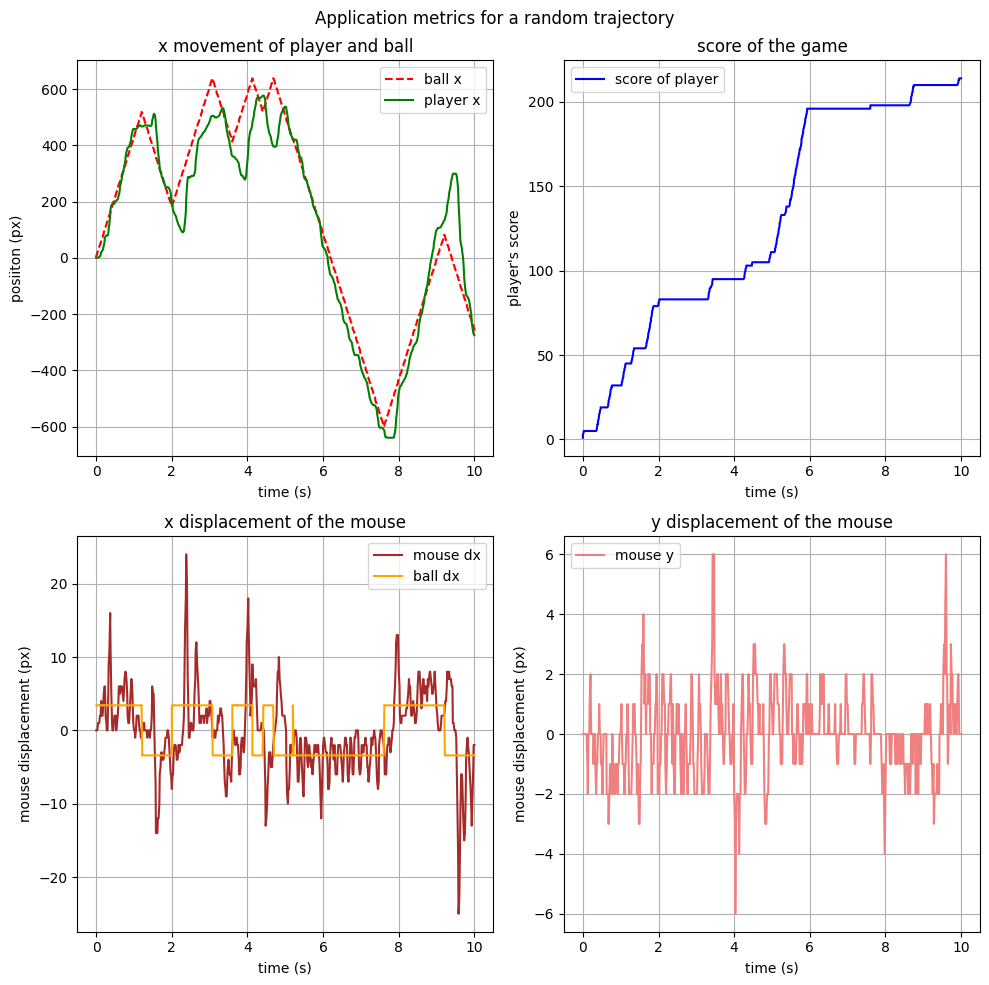

In [16]:
import matplotlib.pyplot as plt

title = "random"
# plt.style.use('dark_background')
# plt.style.context('Solarize_Light2')
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

fig.suptitle(f"Application metrics for a {title} trajectory")
# ax = axs[0]
axs[0, 0].set_title('x movement of player and ball')
axs[0, 0].plot(time, bx, 'r--', label='ball x')
axs[0, 0].plot(time, px, 'g-', label='player x')
axs[0, 0].set_xlabel("time (s)")
axs[0, 0].set_ylabel("posiiton (px)")
axs[0, 0].legend()
axs[0, 0].grid(True)

# ax = axs[0,1]
axs[0, 1].set_title('score of the game')
axs[0, 1].plot(time, score, 'b', label='score of player')
axs[0, 1].set_xlabel("time (s)")
axs[0, 1].set_ylabel("player's score")
axs[0, 1].legend()
axs[0, 1].grid(True)


# ax = axs[1,0]
axs[1,  0].set_title('x displacement of the mouse')
axs[1,  0].plot(time, mdx, 'brown', linestyle='-', label='mouse dx')
axs[1,  0].plot(time[1:], dbx, 'orange', label='ball dx')
axs[1,  0].set_xlabel("time (s)")
axs[1,  0].set_ylabel("mouse displacement (px)")
axs[1,  0].legend()
axs[1,  0].grid(True)

# ax = axs[1,1]
axs[1,  1].set_title('y displacement of the mouse')
axs[1,  1].plot(time, mdy, 'lightcoral', label='mouse y')
axs[1,  1].set_xlabel("time (s)")
axs[1,  1].set_ylabel("mouse displacement (px)")
axs[1,  1].legend()
axs[1,  1].grid(True)

plt.tight_layout()
plt.savefig("../doc/images/plots/" + title + ".png")

In [21]:
# write the dx and dy to a file computed by follow objext displacement
import numpy as np

file_name = "../input/linear_input.in"

dby = np.array(dbx)*0

with open(file_name, 'w') as f:
    f.write("dx;dy\n")
    for i in range(len(dbx)):
        f.write(f"{dbx[i]};{dby[i]}\n")

